In [25]:
# Exercise 1: 
# Perform a simple linear regression to find the m and b 
# values that minimizes the loss (sum of squares)
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data x and y points
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Extract input variables 
X = df["x"].values.reshape(-1,1)

# #Extract output colum 
Y = df["y"].values

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.76, b = 4.69
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))



m = [1.75919315]
b = [4.69359655]


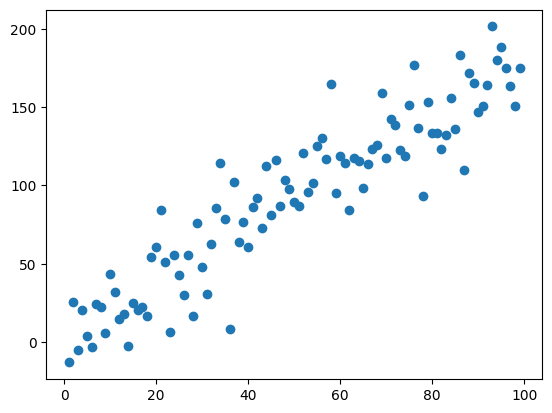

In [26]:
# show in chart
plt.plot(X, Y, 'o') # scatterplot

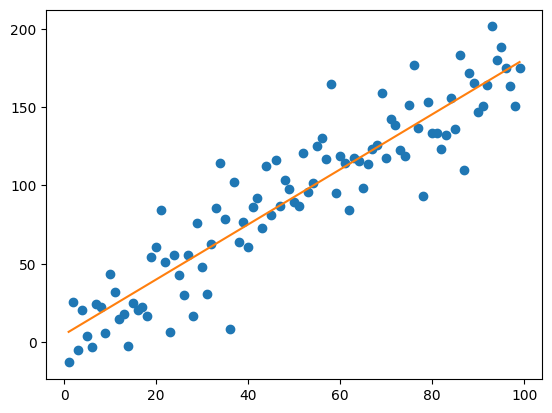

In [28]:
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b)
plt.show()

In [2]:
# Exercise 2:
# Calculate the correlation coefficient and 
# statistical significance of this data (at 95% confidence)
# Is the correlation useful?

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data x and y points
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Print corelations between variables
correlations = df.corr(method='pearson')
print(correlations)
# r = 0.92421

         x        y
x  1.00000  0.92421
y  0.92421  1.00000


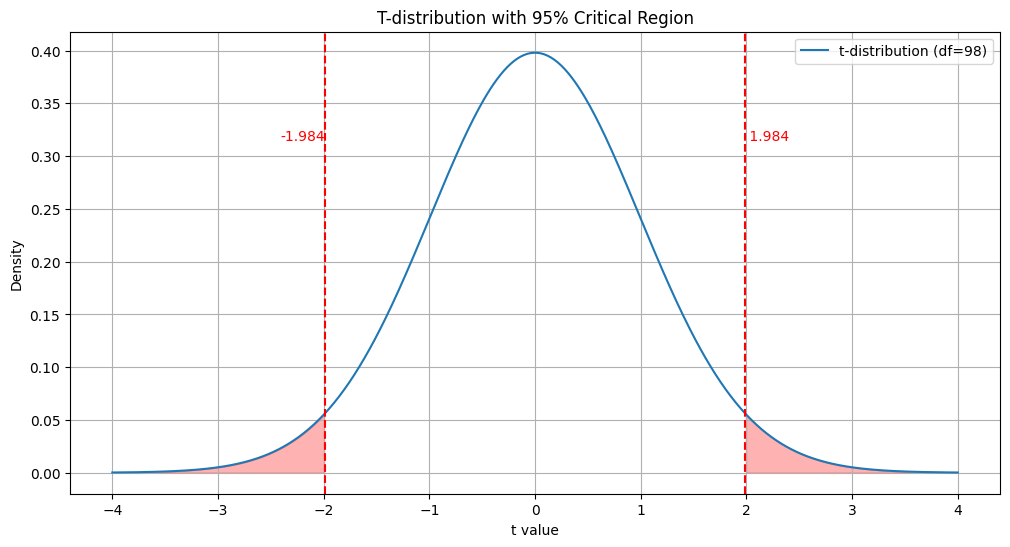

The critical value is approx. +- 1.984467454426692


In [25]:
# Even though it appears we have a strong and compelling positive correlation. But again, we need to evaluate if this was by random luck. 
# Let's pursue our hypothesis test with 95% confidence using a two-tailed test, exploring if there is a relationship between these two variables.
# We will use a T-distribution rather than a normal distribution, which has fatter tails to capture more variance and uncertainty,  to do hypothesis testing with linear regression.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Import data x and y points
data = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Dataset size 
n = data["x"].values.size
df = n - 1 # degrees of freedom for t-distribution

# Generate t-distribution curve
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Critical values for 95% CI
alpha = 0.05
t_left = t.ppf(alpha/2, df)
t_right = t.ppf(1 - alpha/2, df)

plt.figure(figsize=(12, 6))

# Plot t-distribution
plt.plot(x, y, label=f"t-distribution (df={df})")

# Shade critical regions
plt.fill_between(x, y, where=(x < t_left), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x > t_right), color='red', alpha=0.3)

# Vertical lines for critical vlaues
plt.axvline(t_left, color='red', linestyle='--')
plt.axvline(t_right, color='red', linestyle='--')

# Label the critical values
plt.text(t_left, max(y)*0.8, f"{t_left: .3f}", color='red', ha='right', va='center')
plt.text(t_right, max(y)*0.8, f"{t_right: .3f}", color='red', ha='left', va='center')

plt.title("T-distribution with 95% Critical Region")
plt.xlabel("t value")
plt.ylabel("Density")

plt.legend()
plt.grid(True)
plt.show()
print("The critical value is approx. +- {0}".format(t_right))

In [36]:
from scipy.stats import t
from math import sqrt 

# sample size 
n = 99

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient 
r = 0.92421

# Perfrom the test
test_value = r / sqrt((1-r**2)/(n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {},{}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2. 
print("P-VALUE: {0}".format(p_value))

TEST VALUE: 23.83550420591852
CRITICAL RANGE: -1.9844674544266925,1.984467454426692
CORRELATION PROVEN, REJECT H0
P-VALUE: 0.0


In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data x and y points
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Print corelations between variables
coeff_determination = df.corr(method='pearson') **2
print(coeff_determination)
# r = 0.854164

          x         y
x  1.000000  0.854164
y  0.854164  1.000000


x mean: 50.0
Standard error: 20.985967266937593
Standard error at x0: 21.091690693064297
t value: 1.9847231860271193


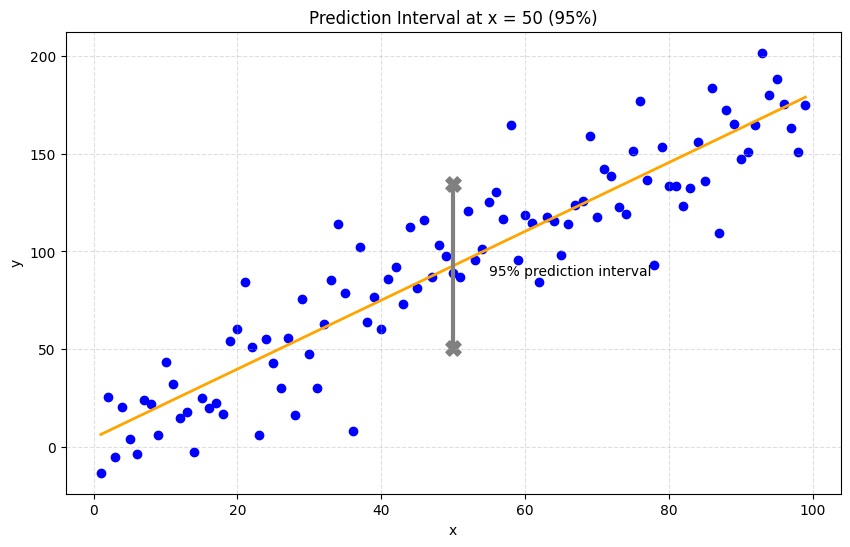

Calculate prediction interval: [50.79208640247934,134.51442150455358]


In [36]:
# Exercise 3
# If I predict where x = 50, what is the 95% prediction interval for the predicted value of y?
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

# Import data x and y points
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")
# Extract input variables 
X = df["x"].values.reshape(-1,1)
# #Extract output colum 
Y = df["y"].values

# Fit a line to the points
fit = LinearRegression().fit(X, Y)
m = fit.coef_[0]
b = fit.intercept_

# Predicted values
y_pred = fit.predict(X)

# Compute statistics
n = len(X)
x0 = 50 # point where we want the vertical CI line

x_mean = np.mean(X)
print("x mean: {0}".format(x_mean))
Sxx = np.sum((X - x_mean)**2)

# Residual standard error
s = np.sqrt(np.sum( (Y - y_pred)**2) / (n-2) )
print("Standard error: {0}".format(s))

# Standard error of predicted mean at x0
SE_yhat = s * np.sqrt(1 + 1/n + (x0 - x_mean)**2 / Sxx)
print("Standard error at x0: {0}".format(SE_yhat))

# t critical value for 95% CI
t_crit = t.ppf(0.975, df=n-2)
print("t value: {0}".format(t_crit))

# Prediction interval bounds
y0 = m * x0 + b
lower = y0 - (t_crit * SE_yhat)
upper = y0 + (t_crit * SE_yhat)

# ----- Plotting ---------
plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(X, Y, color='blue')

# Regression line
plt.plot(X, y_pred, color='orange', linewidth=2)

# Vertical prediction interval line
plt.plot([x0, x0], [lower, upper], color='grey', linewidth=3)

# Upper & lower markers
plt.scatter([x0], [upper], color='grey', s=120, marker='X')
plt.scatter([x0], [lower], color='grey', s=120, marker='X')

# Predicted mean point
# plt.scatter([x0], [y0], color='red', s=80)

# Label
plt.text(x0 + 5, (upper + lower)/2 - 5, "95% prediction interval", color='black')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction Interval at x = 50 (95%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()
print("Calculate prediction interval: [{0},{1}]".format(lower, upper))

In [35]:
import pandas as pd 
from scipy.stats import t
from math import sqrt

# Calculate Prediciton Interval for x=50
points = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",").itertuples())
n = len(points)
x_0 = 50

x_mean = sum(p.x for p in points) / len(points)
print(x_mean)

t_value = t(n-2).ppf(.975)
print("t-value: {0}".format(t_value))

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n-2))
print(standard_error)

margin_of_error = standard_error * \
sqrt(1 + (1/n) + (n * (x_0 - x_mean)**2 ) / (n * sum(p.x **2 for p in points) - sum(p.x for p in points)**2))
print(margin_of_error)

predicted_y = m*x_0+b

print("Calculate prediction interval: [{0},{1}]".format(predicted_y - margin_of_error, predicted_y + margin_of_error))

50.0
t-value: 1.9847231860271193
20.985967266937596
21.0916906930643
Calculate prediction interval: [71.56156326045215,113.74494464658076]
